[Source code (Juyter notebook)](https://colab.research.google.com/drive/1gHMTHuzr1WzJlnJlpNxv0KaTf1FKGKYU?usp=sharing):

https://colab.research.google.com/drive/1gHMTHuzr1WzJlnJlpNxv0KaTf1FKGKYU?usp=sharing

# Calculation of the Fluence rate in a homogeneous infinite medium 

In the case of a homogeneous system with absoption coefficient $\mu_a$, reduced scattering coefficient $\mu_s^\prime$ and Diffusion coefficient $1/3\mu_s^\prime$, assuming a delta like source in the origin of the coordinate system with $n=1$ as $q_0(\vec{r},t)=\delta^{3}(\vec{r})\delta(t)$, we obtain the following diffusion equation:

$$\left(\frac{1}{c} \frac{\partial}{\partial t}-D\nabla^{2}+\mu_{a}\right) \phi(\vec{r},t)=q_{0}(\vec{r},t)$$

The solution of this equation can be obtain by considering the following ansatz:

$$\phi(\vec{r},t)=\phi_{0}(\vec{r},t)\cdot exp(-\mu_a ct)$$

where $\phi_0 (\vec{r},t)$ is the solution for the diffusion equation for a non-absorbing medium, this solution can be found by exploiting the symmetry of the problem and by suitable boundary conditions, which are that at $t<0, \phi_{0}(\vec{r},t) = 0$ and that $\phi_{0} \rightarrow 0$ for $t>0$. Then the general solution, Green function will become:

$$\phi(\vec{r},t)=\frac{c}{(4\pi Dct)^{3/2}}\cdot exp(-r^2/(4Dct) -\mu_a ct)$$

For a particular case, where the detector and source are in the same position the last equation for the fluence becomes (since the variable $r$ is the distance between source-detector):

$$\phi(t)=\frac{c}{(4\pi Dct)^{3/2}}\cdot exp(-\mu_a ct)$$

In the following we will see how this function behaves, by plotting it through time with different absorption and scattering coefficients. 

# Fluence rate in infinite Homogeneous media

To see how the function $\phi(t)$ behaves, first it is defined an ideal infinite medium with constant absorption coefficient and a varying scattering coefficient, then a varying absorption coefficient and a constant scattering coefficient. Our time scale will be around $[1,10]$ ns and the source and detector position will have the same coordinates. 



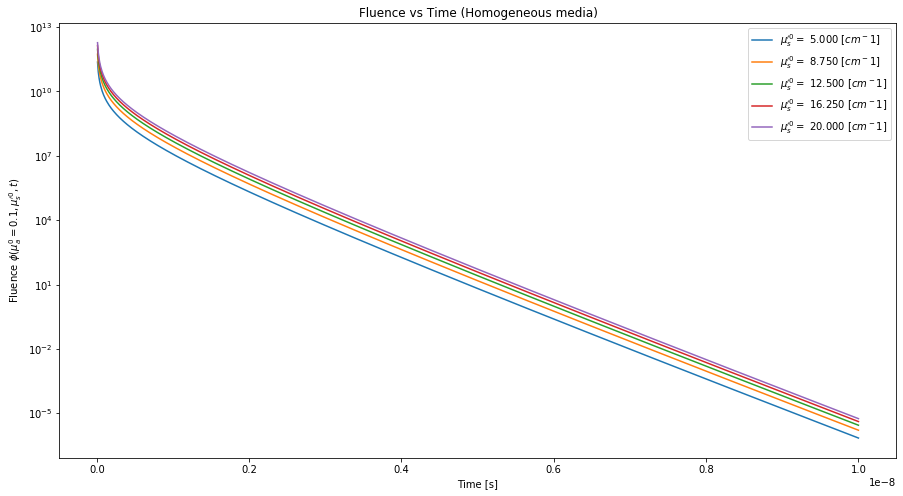

In [1]:
#------------------------------------------------------------------------------
# Fluence rate in infinite Homogeneous media with absorption coefficient fixed
#------------------------------------------------------------------------------
#Libraries
import numpy as np
import matplotlib.pyplot as plt 

# Parameters 
#Time scale
t = np.linspace(0.01, 10, num = 1000)*10**-9 # [s]
# Definition of the function phi_0
ma_0 = 0.1                                  #Absorption coefficient of the medium [1/cm]
def phiZero_mafix (ma_0,t):
# This function calculates and plots the fluence of an infinite homogeneous media vs time, where we 
# have 1 source detector pair in the same spatial position. The plot we get is in logarithmic scale and 
# represents how the fluence behaves with different scattering coefficients at different times (0-10ns)
    ms_p = np.linspace(5,20,num = 5)        #Scattering coefficient of the medium [1/m]
    c = 3*10**10                            #Speed of light due to n = v/c = 1 [cm/s]
    for j in range(len(ms_p)):
        D = 1/3 * 1/ms_p[j]                 #Diffusion coefficent [cm]
        phi_0 = (c/(4*np.pi*D*c*t)**(3/2)) 
        phi_t = phi_0*np.exp(-ma_0*c*t)     #Fluence rate
        #Plot
        plt.rcParams['figure.figsize'] = (15,8) 
        #Labels
        plt.xlabel('Time [s]')
        plt.ylabel('Fluence $\phi(\mu_{a}^{0}=0.1,\mu_{s}^{\prime 0},t)$')
        plt.title('Fluence vs Time (Homogeneous media)')
        #plot command
        plt.semilogy(t,phi_t, label = '$\mu_{s}^{\prime 0} =$ %1.3f [$cm^-1$]' % ms_p[j])
        #prints legend
        plt.legend()
# Call of the function for the fluence in Homogeneous media with fixed absorpiton coefficient
phiZero_mafix(ma_0,t)

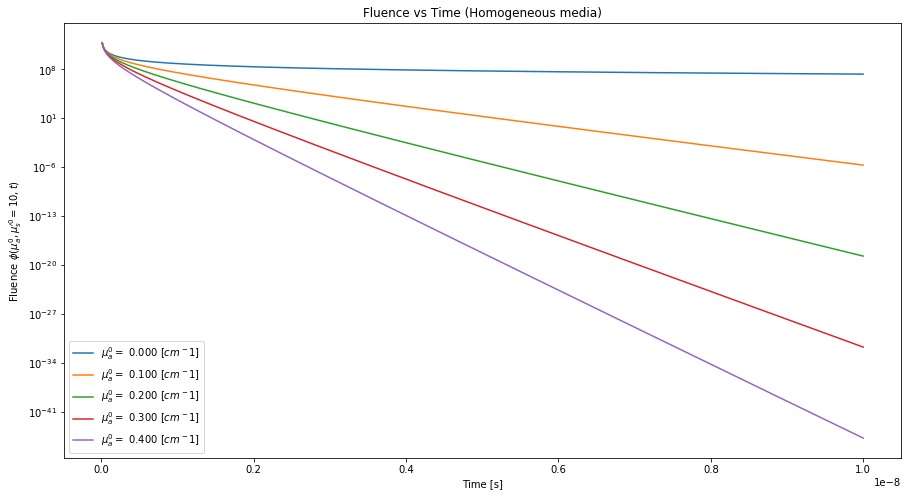

In [2]:
# Fluence rate in infinite Homogeneous media with scattering coefficient fixed
ms_p = 10                                   #scattering coefficient [1/cm]
def phiZero_msfix (ms_p,t):
# This function calculates and plots the fluence of an infinite homogeneous media vs time, where we 
# have 1 source detector pair in the same spatial position. The plot we get is in logarithmic scale and 
# represents how the fluence behaves with different absorption coefficients at different times (0-10ns)
    ma_0 = np.linspace(0.0,0.4,num = 5)     #Absorption coefficient of the medium [1/cm]
    c = 3*10**10                            #Speed of light [cm/s]
    for j in range(len(ma_0)):
        D = 1/3 * 1/ms_p                    #Diffusion coefficient [cm]
        phi_0 = (c/(4*np.pi*D*c*t)**(3/2))  #Homogeneous fluence
        phi_t = phi_0*np.exp(-ma_0[j]*c*t)  #Homogeneous fluence in time
        #Plot
        plt.rcParams['figure.figsize'] = (15,8) #increases the size of figure of the plot
        #Labels
        plt.xlabel('Time [s]')
        plt.ylabel('Fluence $\phi(\mu_{a}^{0},\mu_{s}^{\prime 0}=10,t)$')
        plt.title('Fluence vs Time (Homogeneous media)')
        #plot command
        plt.semilogy(t,phi_t, label = '$\mu_{a}^{0} =$ %1.3f [$cm^-1$]' % ma_0[j])
        #prints legend
        plt.legend()
# Call of the function for the fluence in Homogeneous media with fixed scattering coefficient
phiZero_msfix(ms_p,t)

## Observations

From the results obtained in the last graphs we can have some insights of the formulas written before. First, in both cases we observe that the behaviour of the fluence rate is proportional to $t^{-1/3}\cdot exp[-\mu_a ct]$ therefore the fluence rate is very sensitive to the time scale we choose, by having a greater time range we observe a higher exponential decay which is correct because the more time we take the light in the media will get absorbed and scattered. 

Another observation we can made is that by fixing the absorption coefficient the exponential term remains constant and the fluence rate will change only on its y-intercept therefore a shift upwards is given for greater scattering coefficients (remember that our plots are in logarithmic scale), meaning that at higher values of scattering coefficient the fluence rate will have a greater value since the light is more scattered than absorbed.  

On the other side, when we fix the scattering coefficient and vary the absorption coefficient we observe that the exponential decay is faster for higher absorption coefficents, meaning that the medium absorbs more light in less time. 

# Solution for an absorption perturbation 

Assuming a background normal perturbation due to some absorbing effects described by the absorption coefficient $\mu_{a}(\vec{r})=\mu_{a}+\delta \mu_{a}(\vec{r})$ occupied by a volume of $V=1cm^{3}$ and a source and detector at the origin of the coordinate system. The perturbed fluence then can be represented as a superposition of the unperturbed term and a perturbation due to absorption effects as $\phi(\vec{r},t)= \phi_{0}(\vec{r},t)+\delta \phi(\vec{r},t)$. Therefore to see the evolution of the fluence in time we must solve the diffusion equation for this representation of the fluence, by substitution we arrive at the following:

$$\left(\frac{1}{c} \frac{\partial}{\partial t} - D \nabla^{2} +\mu_{a}\right)\delta \phi(\vec{r},t)=-\delta \mu_{a}(\vec{r})\phi(\vec{r},t)$$

By using the Green's function method the time dependent perturbation can be written as:

$$\delta \phi (\vec{r},t)=\int d\vec{r}^{\prime} \int_{-\infty}^{\infty} dt^\prime -\delta \mu_{a} (\vec{r}^\prime) \phi(\vec{r}^\prime,t^\prime)G(\vec{r},\vec{r}^\prime,t,t^\prime)$$

where the vector $\vec{r}^{\prime}$ is the position of the perturbation and $\vec{r}$ is the position of the detector, furthermore adopting the Born's approximation where $\delta \phi \ll \phi_{0}$ and thus $\phi(\vec{r},t)\approx \phi_{0}(\vec{r},t)$ where $\phi_{0}(\vec{r},t)$ is the fluence for an infinite homogeneous media (Green function) that we calculated earlier assuming a point-like source. Therefore the last expression can be rewritten as:

$$\delta \phi (\vec{r},t)=\int d\vec{r}^{\prime} \int_{-\infty}^{\infty} dt^\prime -\delta \mu_{a} (\vec{r}^\prime) \phi_{0}(\vec{r}^\prime,t^\prime)G(\vec{r},\vec{r}^\prime,t,t^\prime)$$

Therefore after substituting all the components of the integral we arrive at:

$$\delta \phi(\vec{r}^{\prime},t) = -\frac{c^{2}}{(4\pi Dc)^{5/2}t^{3/2}}\cdot exp(-\mu_{a}ct)\int d^{3}\vec{r}^{\prime} \delta \mu_{a} (\vec{r}^{\prime})\left(\frac{1}{\left|\vec{r}^{\prime}-\vec{r}_{s}\right|}-\frac{1}{\left|\vec{r}-\vec{r}^{\prime}\right|}\right)\cdot exp\left[-\left(\left|\vec{r}^{\prime}-\vec{r}_{s}\right|+\left|\vec{r}-\vec{r}^{\prime}\right|\right)^{2}/(4Dct)\right]$$

where $\vec{r}^{\prime}$ is the position of the perturbation, $\vec{r}$ is the position of the detector and
$\vec{r}̣_{s}$ is the position of the source. Then by the defining the relative contrast as:

$$ C = \frac{\delta \phi}{\phi_{0}}$$

And after some simplifications, discretizing our space in voxels, we arrive to the following:

$$ C = \frac{1}{4\pi D} \delta \mu_{a} V \frac{2}{\left|\vec{r}^{\prime}\right|}exp\left[ \frac{-\left|\vec{r}^{\prime}\right|^{2}}{cDt}\right]$$

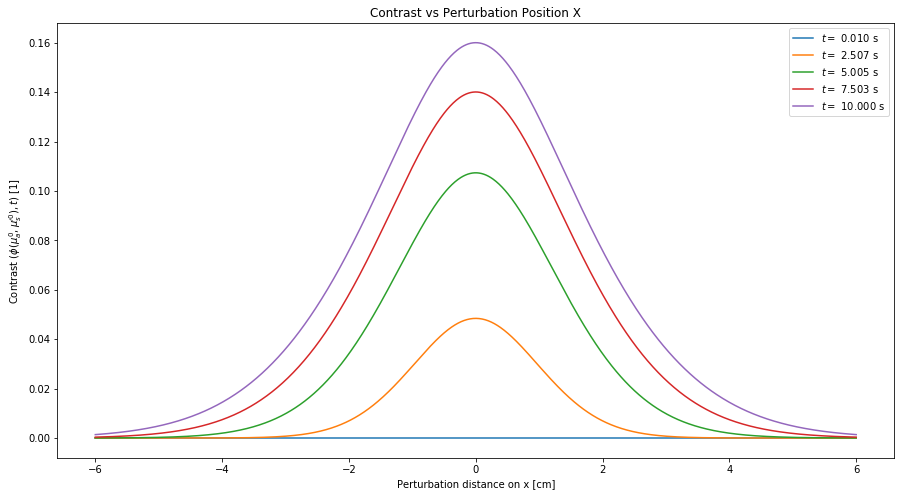

In [2]:
#variable definitions
t = np.linspace(0.01, 10, 5)*10**-9     #Time [s]
ma_0 = 0.1                              #absorption coefficient [1/cm]
ms_p = 10                               #scattering coefficient [1/cm]
dma = 0.1                               #absorption perturbation[1/cm]
D = 1/(3*ms_p)                          #Diffusion coefficient [cm]
xp_1 = np.linspace(-6,6,1000)           #x-coordinate of the perturbation
yp_1 = 0                                #y-coordinate of the perturbation
zp_1 = 2                                #z-coordinate of the perturbation
r = np.sqrt(xp_1**2+yp_1**2+zp_1**2)    #perturabation position vector
for j in range(len(t)):
    c = 3*10**10                        #speed of light
    Con = 1/(4*np.pi*D)*dma*(2/r)*np.exp(-r**2/(c*D*t[j])) #relative contrast 
    #Plot 
    plt.rcParams['figure.figsize'] = (15,8) #increases the size of the plot
    #Labels
    plt.xlabel('Perturbation distance on x [cm]')
    plt.ylabel('Contrast ($\phi(\mu_{a}^{0},\mu_{s}^{\prime 0}),t)$ [1]')
    plt.title('Contrast vs Perturbation Position X')
    #plot command
    tp = t[j]/10**-9
    plt.plot(xp_1,Con,label = '$t =$ %1.3f s' % tp)
    plt.legend()

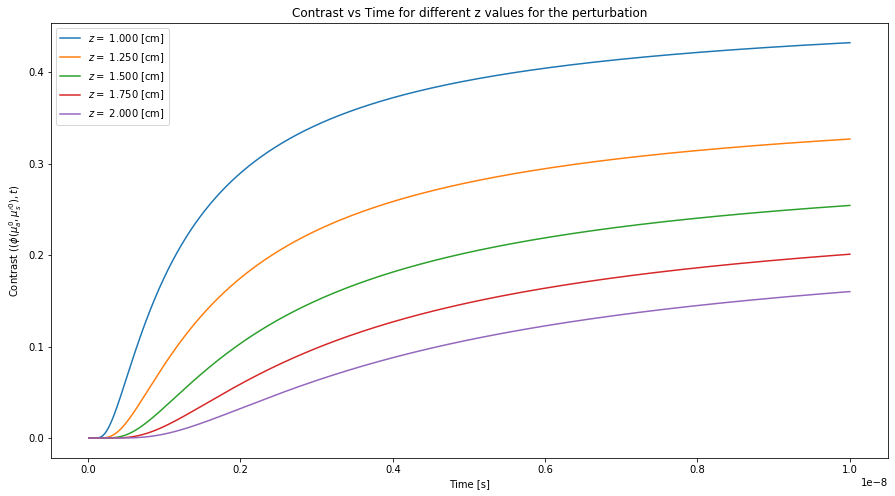

In [4]:
#variable definitions
t = np.linspace(0.01,10 , 1000)*10**-9  #Time [s]
xp_2 = 0                                #x-coordinate of the perturbation
yp_2 = 0                                #y-coordinate of the perturbation
zp_2 = np.linspace(1,2,5)               #z-coordinate of the perturbation
for j in range(len(zp_2)):
    Con = 1/(4*np.pi*D)*dma*(2/zp_2[j])*np.exp(-zp_2[j]**2/(c*D*t)) #relative contrast
    #Plot
    plt.rcParams['figure.figsize'] = (15,8) #increases the size of the plot
    #Labels
    plt.xlabel('Time [s]')
    plt.ylabel('Contrast ($(\phi(\mu_{a}^{0},\mu_{s}^{\prime 0}),t)$')
    plt.title('Contrast vs Time for different z values for the perturbation')
    #plot command
    plt.plot(t,Con, label = '$z =$ %1.3f [cm]' % zp_2[j])
    plt.legend()
